<a href="https://colab.research.google.com/github/sterlinggutterman/Final-Project/blob/main/linear_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Models - Results part 1

In [1]:
! git clone https://www.github.com/sterlinggutterman/Final-Project

Cloning into 'Final-Project'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 141 (delta 61), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (141/141), 40.20 MiB | 5.76 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Updating files: 100% (17/17), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_parquet('/content/Final-Project/full_df (2).parquet')
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,reordered_yes/no,order_day,total_order_count,product_name,aisle_id,department_id,aisle,department
0,361493,27,prior,1,3,9,NaN,25718,1,0,no,tuesday,81,Cold Brew Coffee,26,7,coffee,beverages
1,1662354,27,prior,2,2,17,6.0,30776,1,0,no,monday,81,Organic Raw Kombucha Gingerade,31,7,refrigerated,beverages
2,1662354,27,prior,2,2,17,6.0,9604,2,0,no,monday,81,Hibiscus Organic Raw Kombucha,31,7,refrigerated,beverages
3,1662354,27,prior,2,2,17,6.0,6287,3,0,no,monday,81,Organic & Raw Strawberry Serenity Kombucha,31,7,refrigerated,beverages
4,1662354,27,prior,2,2,17,6.0,20947,4,0,no,monday,81,Passionberry Bliss Kombucha Drink,31,7,refrigerated,beverages


# EDA

In [4]:
df.dtypes

,0
order_id,int64
user_id,int64
eval_set,object
order_number,int64
order_dow,int64
order_hour_of_day,int64
days_since_prior_order,float64
product_id,int64
add_to_cart_order,int64
reordered,int64


In [5]:
# cross-tabulation of days since prior and department
pd.crosstab(df['days_since_prior_order'],df['department'])

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,937,861,4011,10615,2715,290,3351,18907,3774,2338,...,2334,1480,1535,172,173,8236,1466,157,37479,11122
1.0,2305,3696,12075,30436,6824,526,9016,55631,9321,6837,...,6576,3133,5540,555,403,21706,4252,610,102326,29150
2.0,2398,7446,16062,38116,8714,610,11555,77712,12820,9721,...,8254,3541,8305,666,481,26209,5593,998,142893,37778
3.0,1858,8480,16568,36504,9215,592,11539,81388,13109,10054,...,8061,3177,8310,727,524,24373,5192,1057,144217,37308
4.0,1371,6679,13415,29550,7876,471,8852,67185,10704,7843,...,6202,2511,6510,570,442,18638,3928,717,114048,30897
5.0,739,4759,9030,20369,5315,330,5840,45637,7342,5071,...,4075,1669,4224,356,228,12498,2498,420,75000,21081
6.0,599,2956,5970,14026,3732,210,3834,30122,4924,3323,...,2708,1071,2678,246,164,8125,1635,321,48273,14679
7.0,552,1942,4330,10407,2991,167,2916,22546,3604,2401,...,2014,792,1893,151,122,5900,1167,239,35917,10812
8.0,196,915,2020,4449,1259,67,1318,10066,1656,1113,...,1020,384,1070,80,57,2829,637,147,17025,4680


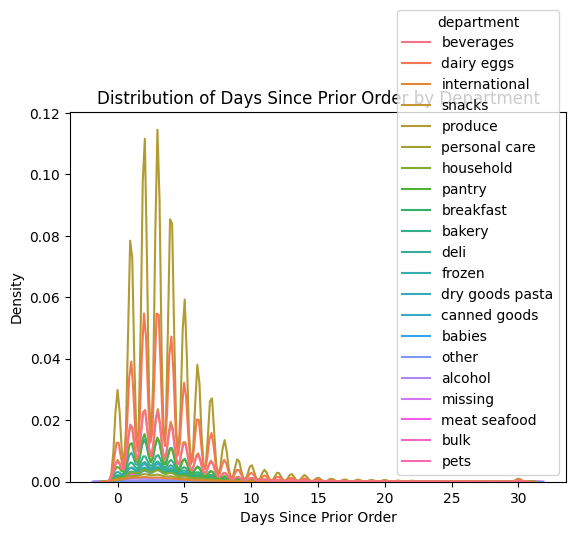

In [6]:
# kernal density plot of days since prior and department
sns.kdeplot(data=df, x='days_since_prior_order', hue='department')
plt.title('Distribution of Days Since Prior Order by Department')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Density')
plt.show()

In [7]:
# cross-tabulation of days since prior and reorders
pd.crosstab(df['days_since_prior_order'],df['order_day'])

order_day,friday,monday,saturday,sunday,thursday,tuesday,wednesday
days_since_prior_order,,,,,,,
0.0,8867,17386,11701,24265,18950,17134,19217
1.0,31687,61271,35341,40833,50792,56209,51266
2.0,46205,57158,61454,52159,71471,82796,72481
3.0,51056,45840,65730,82415,68077,60115,73412
4.0,40634,56884,54177,73414,54375,34970,43684
5.0,26395,39551,35902,54538,28580,32691,21847
6.0,20944,25088,24817,34013,13984,20555,18881
7.0,11329,15194,19620,27804,15569,13664,13674
8.0,5118,10749,7024,9616,6724,7818,7023


In [8]:
group = 'department'
var = 'days_since_prior_order'
df.loc[:,[group, var]].groupby(group).mean()

,days_since_prior_order
department,
alcohol,3.264819
babies,4.033984
bakery,3.828364
beverages,3.727768
breakfast,3.873869
bulk,3.515258
canned goods,3.670519
dairy eggs,3.892395
deli,3.853753


In [9]:
group = 'order_day'
var = 'days_since_prior_order'
df.loc[:,[group, var]].groupby(group).mean()

,days_since_prior_order
order_day,
friday,3.965218
monday,3.836943
saturday,4.057336
sunday,4.143404
thursday,3.509225
tuesday,3.485950
wednesday,3.447449


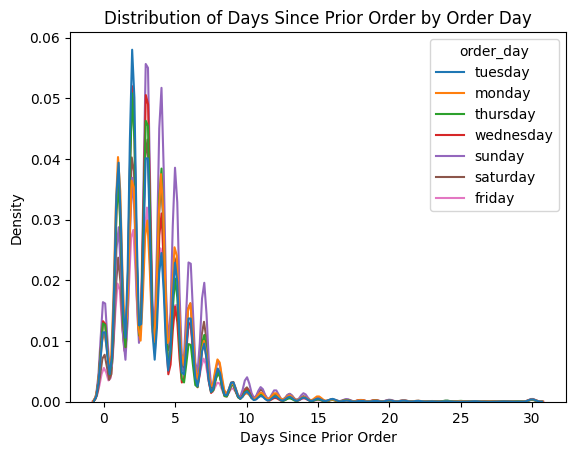

In [10]:
# kernal density plot of days since prior and order day
sns.kdeplot(data=df, x='days_since_prior_order', hue='order_day')
plt.title('Distribution of Days Since Prior Order by Order Day')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Density')
plt.show()

In [11]:
# cross-tabulation of days of week and department
pd.crosstab(df['order_day'],df['department'])

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_day,,,,,,,,,,,,,,,,,,,,,
friday,1028,4995,9821,19249,4702,347,7661,45536,7935,6377,...,4738,2174,5577,427,323,15893,3145,518,86208,20136
monday,1609,5541,12645,31743,7866,515,8848,63725,10430,7296,...,6849,2785,5974,528,410,19798,4215,745,109707,32398
saturday,949,6697,13024,23052,6269,476,10311,60220,10694,8675,...,5578,2850,7165,577,333,19492,3847,749,115913,25495
sunday,1516,6941,16084,38844,10034,629,10424,79161,12700,8871,...,7658,3258,7231,572,460,22623,4731,831,136927,39056
thursday,2403,5337,12894,31908,7868,489,8079,65455,10671,6550,...,6395,2488,5851,528,377,19195,3953,703,107238,31588
tuesday,1746,5528,12319,31522,7667,485,8531,62549,10006,7446,...,6394,2870,5628,523,432,19777,4339,747,106727,31325
wednesday,2310,5388,12620,31019,7690,517,8158,62118,9808,7174,...,6479,2492,5676,529,416,19474,3936,721,104817,30627


In [12]:
# cross-tabulation of days of week and reorders
pd.crosstab(df['order_day'],df['reordered_yes/no'])

reordered_yes/no,no,yes
order_day,,
friday,64861,197974
monday,80203,271339
saturday,80557,261740
sunday,93421,335841
thursday,77808,270258
tuesday,79220,265687
wednesday,77382,262853


In [13]:
# crosstab of add to cart order and department
pd.crosstab(df['add_to_cart_order'],df['department'])

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
add_to_cart_order,,,,,,,,,,,,,,,,,,,,,
1,2701,2529,9422,29853,4736,383,4956,56137,7024,4596,...,6337,1925,5135,304,339,15780,4150,574,81314,18416
2,2010,2832,9377,26461,4696,369,5163,52869,6783,4258,...,4953,1689,4295,322,305,13359,3128,522,82570,18815
3,1430,3005,9181,22986,4641,313,5174,47340,6723,4263,...,4294,1534,4212,339,291,12369,2727,498,78915,18837
4,1074,3216,8404,20047,4261,324,5203,42019,6397,4045,...,3977,1456,3881,332,247,11333,2466,448,72877,17919
5,876,3133,7362,16917,4043,260,4919,37220,6073,4009,...,3537,1427,3403,296,197,10310,2038,413,64935,17058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
95,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
group = 'department'
var = 'add_to_cart_order'
df.loc[:,[group, var]].groupby(group).mean()

,add_to_cart_order
department,
alcohol,4.971110
babies,9.318648
bakery,7.422976
beverages,6.716780
breakfast,8.615633
bulk,7.691151
canned goods,8.490631
dairy eggs,6.846430
deli,8.001966


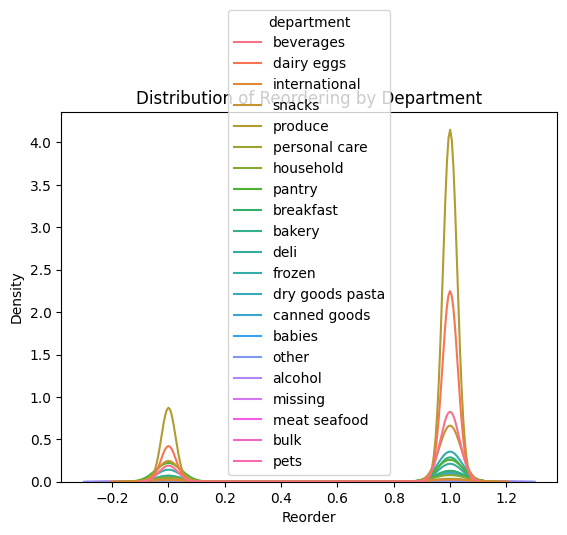

In [15]:
# kernal density plot of reordered and department
sns.kdeplot(data=df, x='reordered', hue='department')
plt.title('Distribution of Reordering by Department')
plt.xlabel('Reorder')
plt.ylabel('Density')
plt.show()

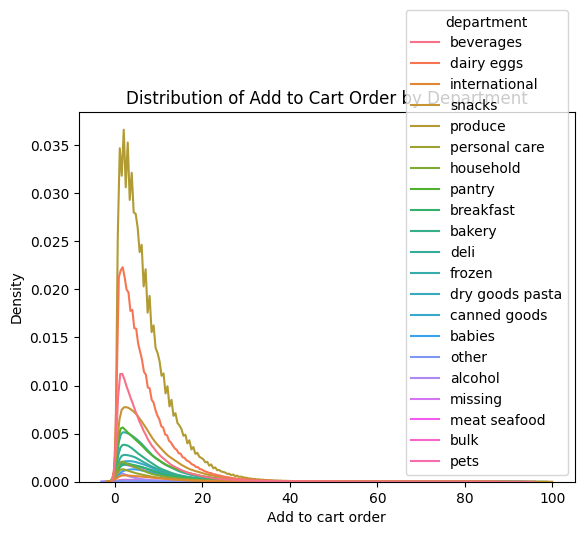

In [16]:
# kernal density plot
sns.kdeplot(data=df, x='add_to_cart_order', hue='department')
plt.title('Distribution of Add to Cart Order by Department')
plt.xlabel('Add to cart order')
plt.ylabel('Density')
plt.show()

In [17]:
group = 'department'
var = 'total_order_count'
df.loc[:,[group, var]].groupby(group).mean()

,total_order_count
department,
alcohol,93.781939
babies,92.582383
bakery,93.231291
beverages,93.193661
breakfast,93.019598
bulk,93.836032
canned goods,92.921580
dairy eggs,93.106579
deli,93.035186


In [18]:
# crosstab of add to cart order and department
pd.crosstab(df['total_order_count'],df['department'])

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
total_order_count,,,,,,,,,,,,,,,,,,,,,
79,150,740,2037,4014,1109,91,1342,10359,1719,1412,...,1009,388,1139,82,83,2779,527,47,17198,4097
80,236,1703,2745,6862,1533,129,1891,14649,2776,1666,...,1571,507,1966,137,104,4356,870,154,25788,6606
81,391,1546,2878,7866,1839,74,2219,14143,2075,1790,...,1818,510,1405,155,86,4226,1033,162,25462,7997
82,167,781,2268,5707,1712,81,1675,13400,1638,1332,...,967,548,1108,93,73,3349,907,62,20007,6598
83,50,2064,3021,6520,1585,110,2203,13567,2483,1725,...,1869,562,1608,157,93,4257,1066,292,24868,6585
84,860,783,3373,6974,1811,113,2471,14254,3089,1920,...,1526,760,1466,172,59,4707,985,121,24835,7698
85,426,1908,2661,6563,1875,87,2126,13305,2155,1677,...,1879,559,1535,148,65,4431,1083,360,21335,6634
86,351,1388,2327,4575,1399,38,1594,12151,1849,1458,...,1213,426,1478,110,98,3289,741,114,21129,4801
87,84,1284,2669,6398,1531,98,1918,12032,2283,1597,...,1190,575,1252,85,69,3593,921,195,20332,7185


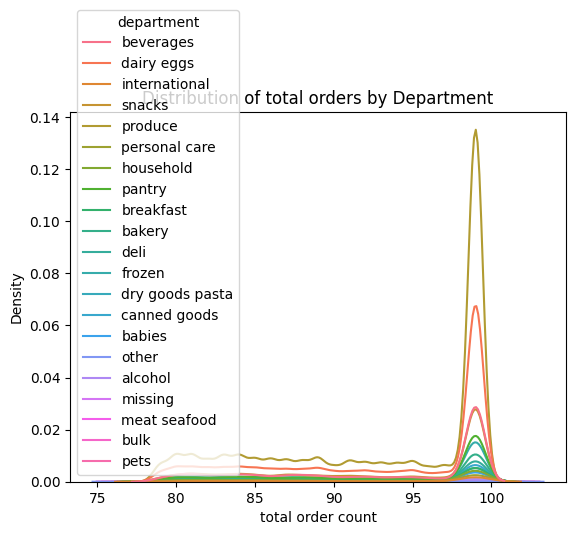

In [19]:
# kernal density plot
sns.kdeplot(data=df, x='total_order_count', hue='department')
plt.title('Distribution of total orders by Department')
plt.xlabel('total order count')
plt.ylabel('Density')
plt.show()

In [20]:
# crosstab of days since prior and reordered
pd.crosstab(df['days_since_prior_order'],df['reordered_yes/no'])

reordered_yes/no,no,yes
days_since_prior_order,,
0.0,26898,90622
1.0,85282,242117
2.0,102361,341363
3.0,92986,353659
4.0,71501,286637
5.0,47395,192109
6.0,31708,126574
7.0,23915,92939
8.0,11937,42135


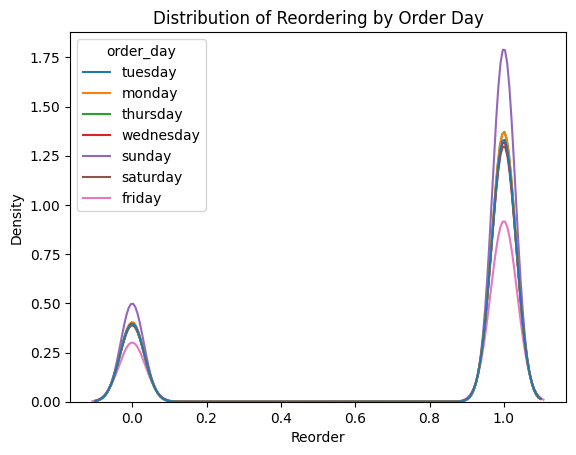

In [21]:
# kernal density plot of reordered and order day
sns.kdeplot(data=df, x='reordered', hue='order_day')
plt.title('Distribution of Reordering by Order Day')
plt.xlabel('Reorder')
plt.ylabel('Density')
plt.show()

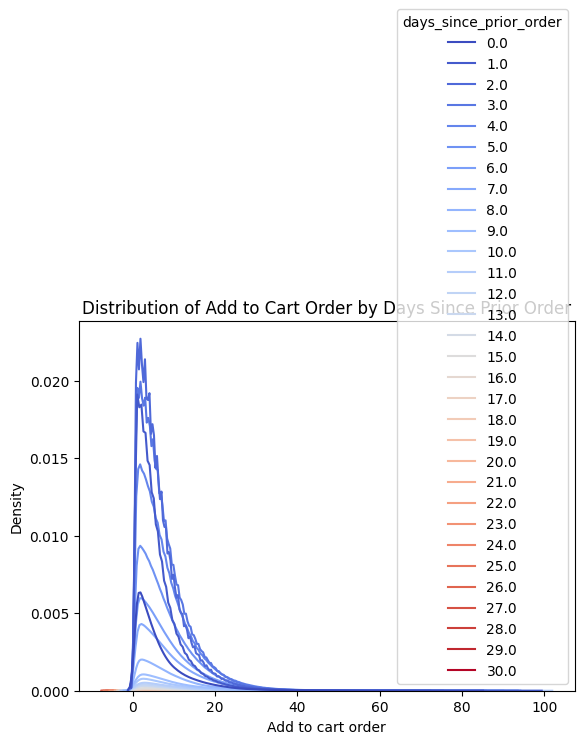

In [22]:
# kernal density plot
sns.kdeplot(data=df, x='add_to_cart_order', hue='days_since_prior_order', palette='coolwarm')

plt.title('Distribution of Add to Cart Order by Days Since Prior Order')
plt.xlabel('Add to cart order')
plt.ylabel('Density')
plt.show()

# Single Linear Regression

### Days since prior order

#### Days since prior order regressed on department

In [23]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)

In [24]:
x_d = pd.get_dummies(df['department'], dtype='int')
y = df['days_since_prior_order']

In [25]:
# regression
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression(fit_intercept=False).fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.0010202953791734748


,variable,coefficient
0,alcohol,3.230084
1,babies,3.984491
2,bakery,3.783104
3,beverages,3.682999
4,breakfast,3.823230
5,bulk,3.464430
6,canned goods,3.626185
7,dairy eggs,3.844003
8,deli,3.803610
9,dry goods pasta,3.782111


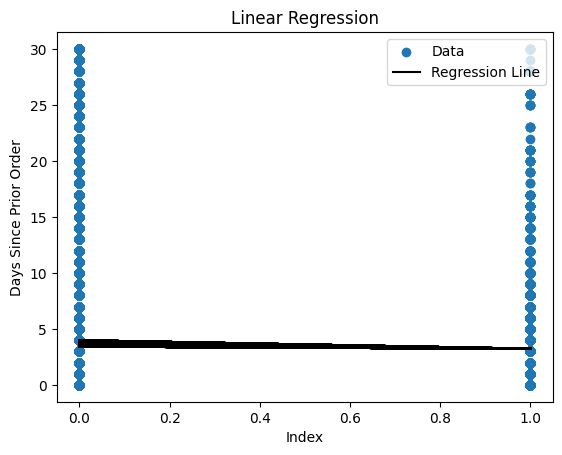

In [26]:
# scatter plot of fit:
plt.scatter(x_d.iloc[:, 0], y, label='Data')
plt.plot(x_d.iloc[:, 0], reg_model.predict(x_d), label='Regression Line', color='black')
plt.xlabel("Index")
plt.ylabel("Days Since Prior Order")
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()

#### Days since prior order regressed on order day

In [27]:
x_d = pd.get_dummies(df['order_day'], dtype='int')
y = df['days_since_prior_order']

# regression
reg_model = LinearRegression(fit_intercept=False).fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.00736240198634408


,variable,coefficient
0,friday,3.888866
1,monday,3.802638
2,saturday,3.995510
3,sunday,4.092941
4,thursday,3.466639
5,tuesday,3.453142
6,wednesday,3.409978


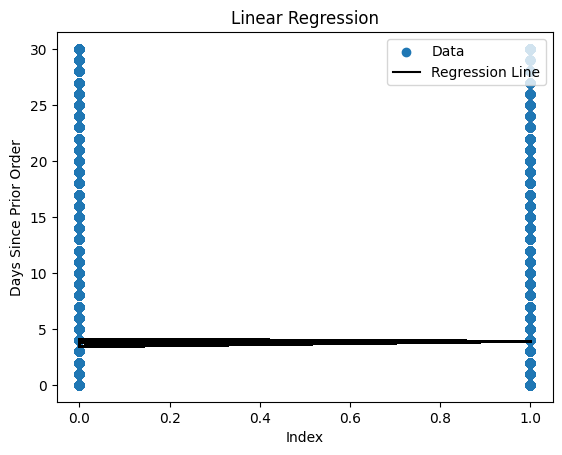

In [28]:
# scatter plot of fit:
plt.scatter(x_d.iloc[:, 0], y, label='Data')
plt.plot(x_d.iloc[:, 0], reg_model.predict(x_d), label='Regression Line', color='black')
plt.xlabel("Index")
plt.ylabel("Days Since Prior Order")
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()

## Reordered

#### Reordered regressed on department

In [29]:
x_d = pd.get_dummies(df['department'], dtype='int')
y = df['reordered']

# regression
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression(fit_intercept=False).fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.045411893520771573


,variable,coefficient
0,alcohol,0.790762
1,babies,0.735523
2,bakery,0.799233
3,beverages,0.813246
4,breakfast,0.745067
5,bulk,0.733950
6,canned goods,0.648665
7,dairy eggs,0.842353
8,deli,0.782072
9,dry goods pasta,0.641375


#### Reordered regressed on order day

In [31]:
x_d = pd.get_dummies(df['order_day'], dtype='int')
y = df['reordered']

# regression
reg_model = LinearRegression(fit_intercept=False).fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.0003837100094510326


,variable,coefficient
0,friday,0.753225
1,monday,0.771854
2,saturday,0.764658
3,sunday,0.782368
4,thursday,0.776456
5,tuesday,0.770315
6,wednesday,0.772563


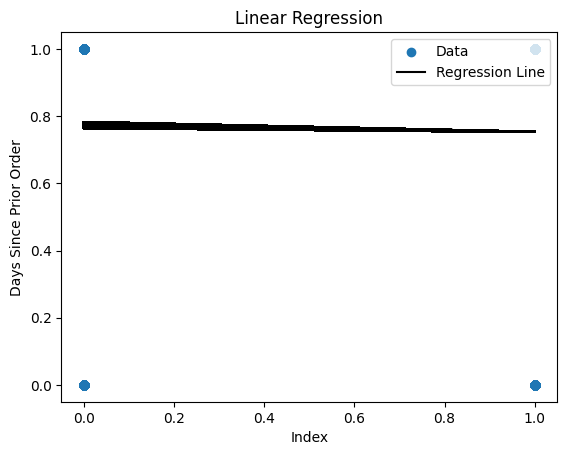

In [32]:
# Scatter plot of fit:
plt.scatter(x_d.iloc[:, 0], y, label='Data')
plt.plot(x_d.iloc[:, 0], reg_model.predict(x_d), label='Regression Line', color='black')
plt.xlabel("Index")
plt.ylabel("Days Since Prior Order")
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()

# Multiple Linear Regression

In [33]:
r = pd.concat([pd.get_dummies(df['department'],dtype='int'),pd.get_dummies(df['order_day'], dtype='int'), pd.get_dummies(df['days_since_prior_order'], dtype='int'),pd.get_dummies(df['add_to_cart_order'], dtype='int')], axis=1)

In [34]:
# regression
r.columns = r.columns.astype(str)
y = df['reordered']

from sklearn.linear_model import LinearRegression
reg_model = LinearRegression(fit_intercept=False).fit(r, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(r, y))
result

R-squared:  0.06269693732045123


,variable,coefficient
0,alcohol,-1.212874e+11
1,babies,-1.212874e+11
2,bakery,-1.212874e+11
3,beverages,-1.212874e+11
4,breakfast,-1.212874e+11
...,...,...
152,94,3.944933e+10
153,95,3.944933e+10
154,96,3.944933e+10
155,97,3.944933e+10
